In [59]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import textwrap
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import HTML, Markdown

Read data and remove spaces

In [3]:
df = pd.read_csv("data.csv", delimiter=";", skipinitialspace=True, decimal=",", thousands=".")
df.columns= [x.strip() for x in df.columns]
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

Change pandas settings to print all rows in the data frame.

In [4]:
pd.set_option('display.max_rows', df.shape[0]+1)

Original dataframe

In [5]:
display(df.sort_values(by='Paese').reset_index())

index                                              Paese  \
0       53                                        Afghanistan   
1        1                                            Albania   
2      102                                            Algeria   
3       45                                            Andorra   
4      123                                             Angola   
5      175                                  Antigua e Barbuda   
6      193                                            Apolidi   
7       79                                     Arabia Saudita   
8      155                                          Argentina   
9       67                                            Armenia   
10     182                                          Australia   
11      24                                            Austria   
12      71                                        Azerbaigian   
13     172                                            Bahamas   
14      87                                            Bahrein   
15      47                                         Bangladesh   
16     173                                           Barbados   
17      25                                             Belgio   
18     176                                             Belize   
19     117                                 Benin (ex Dahomey)   
20      88                                             Bhutan   
21      17                                        Bielorussia   
22     157                                            Bolivia   
23      14                                  Bosnia-Erzegovina   
24     144                                           Botswana   
25     149                                            Brasile   
26      92                                             Brunei   
27       6                                           Bulgaria   
28     104                       Burkina Faso (ex Alto Volta)   
29     127                                            Burundi   
30      77                                           Cambogia   
31     103                                            Camerun   
32     161                                             Canada   
33     111                                         Capo Verde   
34     131                                               Ciad   
35     160                                               Cile   
36      39                                              Cipro   
37      44                                 Città del Vaticano   
38     153                                           Colombia   
39     146                                             Comore   
40     167                                         Costa Rica   
41      99                                     Costa d'Avorio   
42      16                                            Croazia   
43     151                                               Cuba   
44      33                                          Danimarca   
45     164                                           Dominica   
46     148                                            Ecuador   
47      94                                             Egitto   
48     152                                        El Salvador   
49      89                                Emirati Arabi Uniti   
50     108                                            Eritrea   
51      36                                            Estonia   
52     143                                           Eswatini   
53     107                                            Etiopia   
54       7                                  Federazione Russa   
55     186                                               Figi   
56      49                                          Filippine   
57      34                                          Finlandia   
58      11                                            Francia   
59     130                                              Gabon   
60     100                              

In [6]:
df['Totale '] = pd.to_numeric(df['Totale'])

In [7]:
df_sorted_by_total = df.sort_values(by=['Totale'], ascending=False)
display(df_sorted_by_total)

Paese  \
0                                              Romania   
1                                              Albania   
93                                             Marocco   
46                          Repubblica Popolare Cinese   
2                                              Ucraina   
47                                          Bangladesh   
48                                               India   
49                                           Filippine   
94                                              Egitto   
50                                            Pakistan   
95                                             Nigeria   
96                                             Senegal   
51                               Sri Lanka (ex Ceylon)   
3                                              Moldova   
97                                             Tunisia   
147                                               Perù   
4                                              Polonia   
148                                            Ecuador   
149                                            Brasile   
5                                   Macedonia del Nord   
6                                             Bulgaria   
98                                               Ghana   
7                                    Federazione Russa   
8                                               Kosovo   
9                                             Germania   
10                                Repubblica di Serbia   
11                                             Francia   
150                              Repubblica Dominicana   
52                                             Georgia   
99                                      Costa d'Avorio   
12                                              Spagna   
13                                         Regno Unito   
151                                               Cuba   
152                                        El Salvador   
100                                             Gambia   
101                                               Mali   
153                                           Colombia   
14                                   Bosnia-Erzegovina   
15                                             Turchia   
102                                            Algeria   
53                                         Afghanistan   
54                       Repubblica Islamica dell'Iran   
154                              Stati Uniti d'America   
16                                             Croazia   
103                                            Camerun   
155                                          Argentina   
104                       Burkina Faso (ex Alto Volta)   
156                                          Venezuela   
157                                            Bolivia   
105                                             Guinea   
106                                            Somalia   
17                                         Bielorussia   
18                                         Paesi Bassi   
19                                          Slovacchia   
20                                            Ungheria   
21                                            Svizzera   
22                                              Grecia   
23                                          Portogallo   
55                                            Giappone   
56                                                Iraq   
57                                               Siria   
107                                            Etiopia   
108                                            Eritrea   
24                                             Austria   
25                                              Belgio   
58                                          Thailandia   
109                                               Togo   
26                                     Repubblica Ceca   
27                                            L

In [34]:
top_20 = df_sorted_by_total.head(20) 
colors = ["red" if x > 200_000 else "blue" for x in top_20['Totale']]

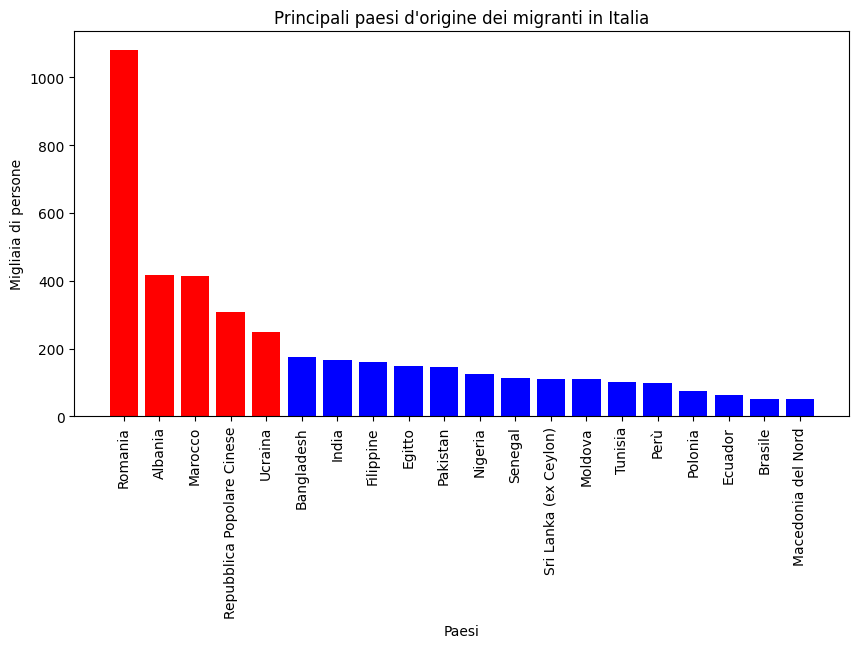

In [35]:
figure = plt.figure(figsize=(10, 5))
plt.xlabel("Paesi")
plt.title("Principali paesi d'origine dei migranti in Italia")
plt.ylabel("Migliaia di persone")
plt.xticks(rotation='vertical')
plt.bar(top_20['Paese'], top_20['Totale']/1000, color = colors)
plt.show()

<b> Paesi con più di 200 mila migranti in Italia sono assegnalati in rosso </b>

<h3> Paesi per area geografica </h3>

In [87]:
df_areas = df[['Area', 'Paese']].groupby('Area')
df_areas = df_areas['Paese'].apply(lambda x: '  -  '.join(x) ).reset_index()

for r in df_areas.index:
    display(Markdown(f"**{df_areas.loc[r]['Area']}**"))
    display(Markdown(f"<div style='width:60%; text-align:justify;'>{df_areas.loc[r]['Paese']}</div>"), HTML('<br>'))

**Africa centro meridionale**

<div style='width:60%; text-align:justify;'>Camerun  -  Repubblica democratica del Congo (ex Zaire)  -  Repubblica del Congo  -  Angola  -  Sud Africa  -  Gabon  -  Ciad  -  Repubblica Centrafricana  -  Guinea Equatoriale  -  Namibia  -  São Tomé e Principe  -  Eswatini  -  Botswana  -  Lesotho</div>

**Africa occidentale**

<div style='width:60%; text-align:justify;'>Nigeria  -  Senegal  -  Ghana  -  Costa d'Avorio  -  Gambia  -  Mali  -  Burkina Faso (ex Alto Volta)  -  Guinea  -  Togo  -  Capo Verde  -  Benin (ex Dahomey)  -  Guinea Bissau  -  Sierra Leone  -  Niger  -  Liberia  -  Mauritania</div>

**Africa orientale**

<div style='width:60%; text-align:justify;'>Somalia  -  Etiopia  -  Eritrea  -  Mauritius  -  Kenya  -  Madagascar  -  Tanzania  -  Burundi  -  Uganda  -  Ruanda  -  Mozambico  -  Seychelles  -  Zambia  -  Zimbabwe (ex Rhodesia)  -  Malawi  -  Gibuti  -  Comore</div>

**Africa settentrionale**

<div style='width:60%; text-align:justify;'>Marocco  -  Egitto  -  Tunisia  -  Algeria  -  Libia  -  Sudan  -  Sud Sudan</div>

**Altri paesi europei**

<div style='width:60%; text-align:justify;'>Svizzera  -  San Marino  -  Norvegia  -  Islanda  -  Principato di Monaco  -  Liechtenstein  -  Città del Vaticano  -  Andorra</div>

**America centro meridionale**

<div style='width:60%; text-align:justify;'>Perù  -  Ecuador  -  Brasile  -  Repubblica Dominicana  -  Cuba  -  El Salvador  -  Colombia  -  Argentina  -  Venezuela  -  Bolivia  -  Messico  -  Honduras  -  Cile  -  Paraguay  -  Uruguay  -  Dominica  -  Guatemala  -  Nicaragua  -  Costa Rica  -  Haiti  -  Panama  -  Giamaica  -  Trinidad e Tobago  -  Bahamas  -  Barbados  -  Guyana  -  Antigua e Barbuda  -  Belize  -  Saint Lucia  -  Saint Kitts e Nevis  -  Grenada  -  Suriname  -  Saint Vincent e Grenadine</div>

**America settentrionale**

<div style='width:60%; text-align:justify;'>Stati Uniti d'America  -  Canada</div>

**Apolidi**

<div style='width:60%; text-align:justify;'>Apolidi</div>

**Asia centro meridionale**

<div style='width:60%; text-align:justify;'>Bangladesh  -  India  -  Pakistan  -  Sri Lanka (ex Ceylon)  -  Afghanistan  -  Kirghizistan  -  Kazakhstan  -  Nepal  -  Uzbekistan  -  Tagikistan  -  Turkmenistan  -  Bhutan  -  Maldive</div>

**Asia occidentale**

<div style='width:60%; text-align:justify;'>Georgia  -  Repubblica Islamica dell'Iran  -  Iraq  -  Siria  -  Libano  -  Israele  -  Armenia  -  Giordania  -  Territori dell'Autonomia Palestinese  -  Azerbaigian  -  Yemen  -  Arabia Saudita  -  Kuwait  -  Qatar  -  Bahrein  -  Emirati Arabi Uniti  -  Oman</div>

**Asia orientale**

<div style='width:60%; text-align:justify;'>Repubblica Popolare Cinese  -  Filippine  -  Giappone  -  Thailandia  -  Repubblica di Corea (Corea del Sud)  -  Indonesia  -  Vietnam  -  Taiwan  -  Malaysia  -  Myanmar (ex Birmania)  -  Mongolia  -  Cambogia  -  Singapore  -  Timor Est  -  Repubblica Democratica Popolare di Corea (Corea del Nord)  -  Laos  -  Brunei</div>

**Europa centro orientale**

<div style='width:60%; text-align:justify;'>Albania  -  Ucraina  -  Moldova  -  Macedonia del Nord  -  Federazione Russa  -  Kosovo  -  Repubblica di Serbia  -  Bosnia-Erzegovina  -  Turchia  -  Bielorussia  -  Montenegro</div>

**Oceania**

<div style='width:60%; text-align:justify;'>Australia  -  Nuova Zelanda  -  Samoa  -  Papua Nuova Guinea  -  Figi  -  Tonga  -  Isole Salomone  -  Vanuatu  -  Kiribati  -  Isole Marshall  -  Palau</div>

**Unione Europea**

<div style='width:60%; text-align:justify;'>Romania  -  Polonia  -  Bulgaria  -  Germania  -  Francia  -  Spagna  -  Regno Unito  -  Croazia  -  Paesi Bassi  -  Slovacchia  -  Ungheria  -  Grecia  -  Portogallo  -  Austria  -  Belgio  -  Repubblica Ceca  -  Lituania  -  Irlanda  -  Slovenia  -  Svezia  -  Lettonia  -  Danimarca  -  Finlandia  -  Estonia  -  Malta  -  Cipro  -  Lussemburgo</div>

<h3> Totale di migranti per area geografica </h3>

In [103]:
percentual_lambda = {'%' : lambda x: 100*x['Totale']/x['Totale'].sum()} 
df_groupedby_area = df[['Area', 'Maschi', 'Femmine', 'Totale']].groupby('Area').sum()\
.sort_values(by=['Totale'], ascending=False).assign(**percentual_lambda)

df_groupedby_area.loc['Totale'] = df_groupedby_area.sum(numeric_only=True)
df_groupedby_area[['Maschi', 'Femmine', 'Totale']] = df_groupedby_area[['Maschi', 'Femmine', 'Totale']].astype(int)
display(df_groupedby_area)

Maschi  Femmine   Totale           %
Area                                                             
Unione Europea               586728   834812  1421540   27.649207
Europa centro orientale      401213   584807   986020   19.178265
Africa settentrionale        402411   286672   689083   13.402787
Asia centro meridionale      399122   220549   619671   12.052712
Asia orientale               229412   260392   489804    9.526775
Africa occidentale           278304   122914   401218    7.803762
America centro meridionale   145621   224794   370415    7.204638
Asia occidentale              29247    42514    71761    1.395764
Africa orientale              18634    17199    35833    0.696958
Africa centro meridionale     13335    11964    25299    0.492070
America settentrionale         7765    10047    17812    0.346447
Altri paesi europei            4568     5683    10251    0.199384
Oceania                         834     1157     1991    0.038725
Apolidi                         345      298      643    0.012506
Totale                      2517539  2623802  5141341  100.000000

In [107]:
df_groupedby_area = df_groupedby_area[:][:-1]

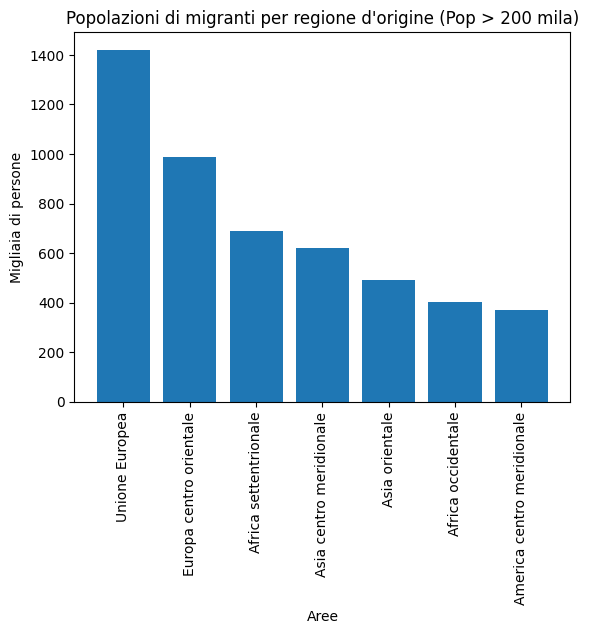

In [108]:
large_populations = df_groupedby_area[df_groupedby_area['Totale'] > 200_000]
plt.bar(large_populations.index, large_populations['Totale']/1000)
plt.title("Popolazioni di migranti per regione d'origine (Pop > 200 mila)")
plt.xlabel("Aree")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

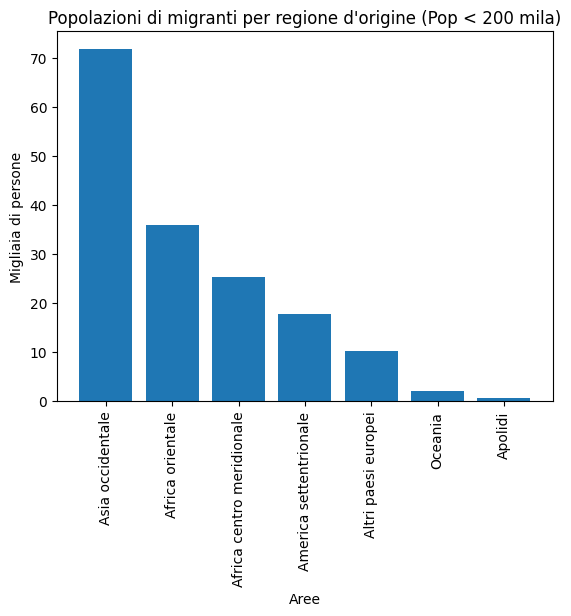

In [109]:
small_populations = df_groupedby_area[df_groupedby_area['Totale'] < 200_000]
plt.bar(small_populations.index, small_populations['Totale']/1000)
plt.title("Popolazioni di migranti per regione d'origine (Pop < 200 mila)")
plt.xlabel("Aree")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

<h3> Percentuale di migranti per area di origine. </h3>

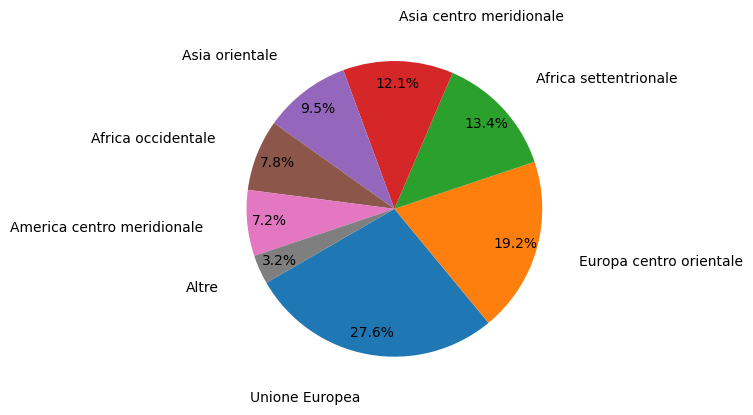

In [110]:
fig, ax = plt.subplots()
small_slices = df_groupedby_area[(df_groupedby_area['%'] <= 1.5)].groupby(df_groupedby_area['%'] <= 1.5).sum()
small_slices.index = ["Altre"]
df_groupedby_area_condensed = pd.concat([df_groupedby_area[(df_groupedby_area['%'] > 1.5)], small_slices])

ax.pie(df_groupedby_area_condensed['%'], labels=df_groupedby_area_condensed.index, autopct='%1.1f%%', labeldistance=1.3, startangle=210, pctdistance=0.85);

<h3> Percentuale di migranti (maschi) per area di origine</h3>

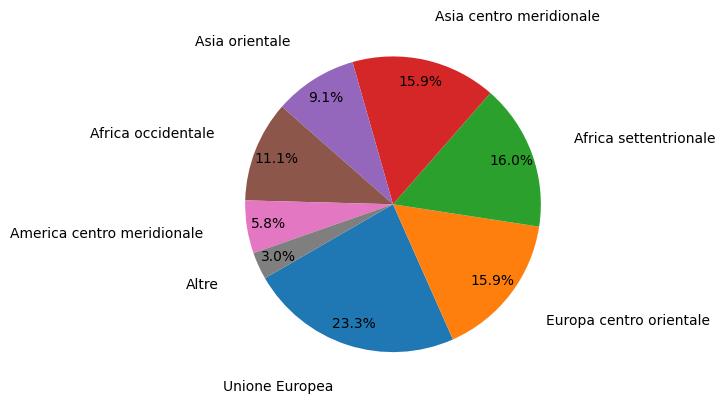

In [113]:
sum_men = df_groupedby_area['Maschi'].sum()
threshold = 0.015*sum_men
small_slices = df_groupedby_area[(df_groupedby_area['Maschi'] <= threshold)].groupby(df_groupedby_area['Maschi'] <= threshold).sum()
small_slices.index = ["Altre"]
df_groupedby_area_condensed = pd.concat([df_groupedby_area[(df_groupedby_area['Maschi'] > threshold)], small_slices])

fig, ax = plt.subplots()
_ = ax.pie(100*df_groupedby_area_condensed['Maschi']/sum_men, labels=df_groupedby_area_condensed.index, autopct='%1.1f%%', labeldistance=1.3, startangle=210, pctdistance=0.85)

<h3> Percentuale di migranti (femmine) per area di origine</h3>

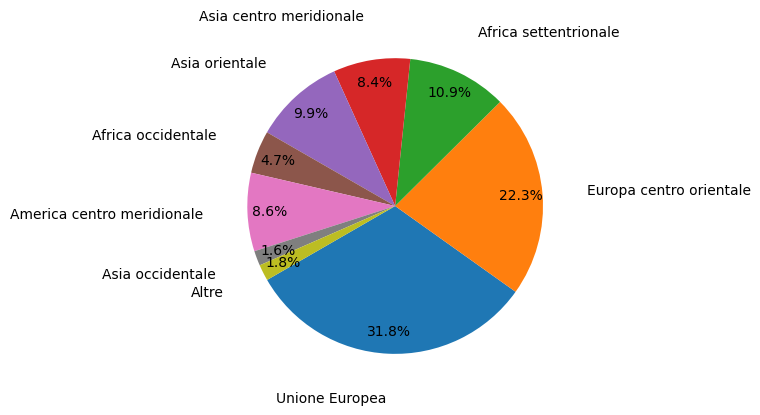

In [114]:
sum_women = df_groupedby_area['Femmine'].sum()
threshold = 0.015*sum_women
small_slices = df_groupedby_area[(df_groupedby_area['Femmine'] <= threshold)].groupby(df_groupedby_area['Femmine'] <= threshold).sum()
small_slices.index = ["Altre"]
df_groupedby_area_condensed = pd.concat([df_groupedby_area[(df_groupedby_area['Femmine'] > threshold)], small_slices])

fig, ax = plt.subplots()
_ = ax.pie(100*df_groupedby_area_condensed['Femmine']/sum_women, labels=df_groupedby_area_condensed.index,  autopct='%1.1f%%', labeldistance=1.3, startangle=210, pctdistance=0.85)

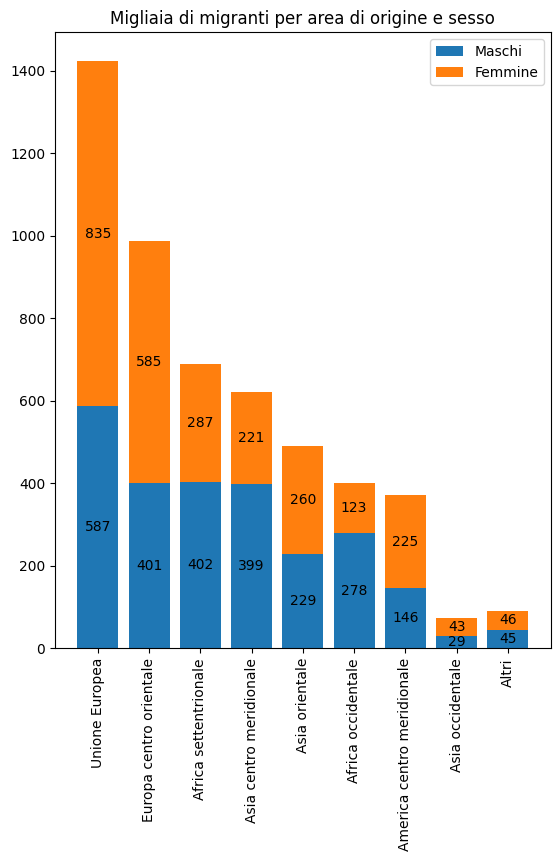

In [116]:
total = df_groupedby_area['Totale'].sum()
small_values = df_groupedby_area[df_groupedby_area['Totale'] <= 0.01*total].groupby(df_groupedby_area['Totale'] <= 0.01*total).sum()
small_values.index = ['Altri']

df_groupedby_area_condesed = pd.concat([df_groupedby_area[(df_groupedby_area['Totale'] > 0.01*total)], small_values])

weight_counts = {
    "Maschi": (df_groupedby_area_condesed['Maschi']/1_000).round(),
    "Femmine": (df_groupedby_area_condesed['Femmine']/1_000).round(),
}
width = 0.8

fig, ax = plt.subplots()
fig.set_figheight(8)
bottom = np.zeros(len(df_groupedby_area_condesed.index))

for boolean, weight_count in weight_counts.items():
    p = ax.bar(df_groupedby_area_condesed.index, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

for c in ax.containers:
    ax.bar_label(c, label_type='center')

ax.set_title("Migliaia di migranti per area di origine e sesso")
ax.legend(loc="upper right")

plt.xticks(rotation='vertical')

plt.show()

<h3> Paesi con più migranti maschi </h3>

In [125]:
df_sorted_by_number_of_men = df[['Paese', 'Area', 'Maschi']].sort_values(by=['Maschi'], ascending=False, ignore_index=True)
display(df_sorted_by_number_of_men)

Paese  \
0                                              Romania   
1                                              Marocco   
2                                              Albania   
3                           Repubblica Popolare Cinese   
4                                           Bangladesh   
5                                             Pakistan   
6                                               Egitto   
7                                                India   
8                                              Senegal   
9                                              Nigeria   
10                                           Filippine   
11                                             Tunisia   
12                               Sri Lanka (ex Ceylon)   
13                                             Ucraina   
14                                                Perù   
15                                             Moldova   
16                                               Ghana   
17                                             Ecuador   
18                                  Macedonia del Nord   
19                                              Gambia   
20                                              Kosovo   
21                                                Mali   
22                                      Costa d'Avorio   
23                                             Polonia   
24                                            Bulgaria   
25                                             Brasile   
26                                Repubblica di Serbia   
27                                         Afghanistan   
28                                         Regno Unito   
29                                            Germania   
30                                             Francia   
31                               Repubblica Dominicana   
32                                             Algeria   
33                                             Turchia   
34                                   Bosnia-Erzegovina   
35                                              Guinea   
36                        Burkina Faso (ex Alto Volta)   
37                                              Spagna   
38                                         El Salvador   
39                       Repubblica Islamica dell'Iran   
40                                             Camerun   
41                                            Colombia   
42                                   Federazione Russa   
43                                             Croazia   
44                                             Somalia   
45                                                Cuba   
46                               Stati Uniti d'America   
47                                           Argentina   
48                                                Iraq   
49                                             Bolivia   
50                                           Venezuela   
51                                             Georgia   
52                                         Paesi Bassi   
53                                               Siria   
54                                                Togo   
55                                              Grecia   
56                                             Eritrea   
57                                            Svizzera   
58                                          Portogallo   
59                                              Libano   
60                                              Belgio   
61                                             Etiopia   
62                                           Mauritius   
63                                       Guinea Bissau   
64                                            Ungheria   
65                                               Sudan   
66                                             Austria   
67                                          Slovacchia   
68                                             

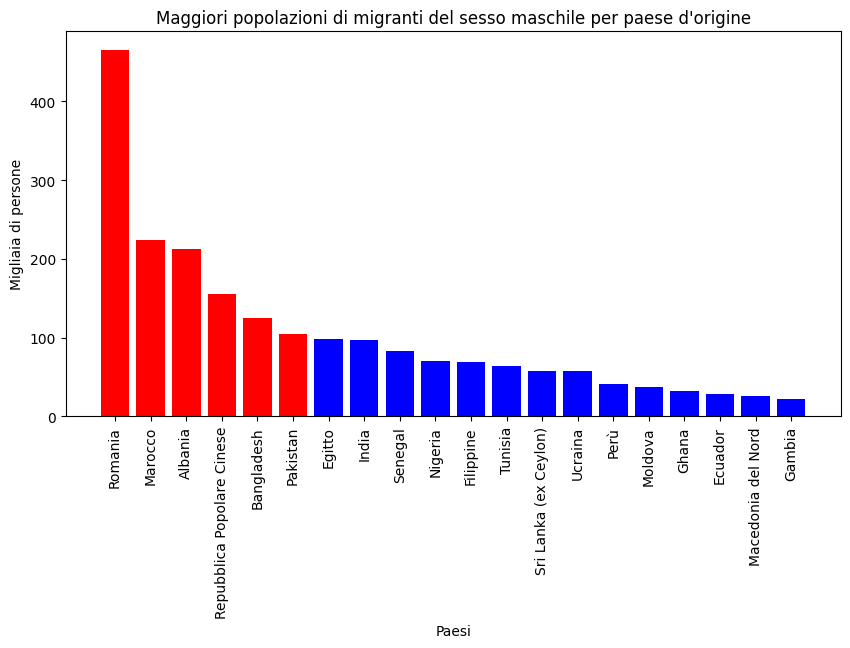

In [126]:
top_countries = df_sorted_by_number_of_men.head(20)
colors = ["red" if x > 100_000 else "blue" for x in  top_countries['Maschi']]
plt.figure(figsize=(10, 5))
plt.bar(top_countries['Paese'], top_countries['Maschi']/1000, color = colors)
plt.title("Maggiori popolazioni di migranti del sesso maschile per paese d'origine")
plt.xlabel("Paesi")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

<h3> Paese con più migrante femmine </h3>

In [129]:
df_sorted_by_number_of_women = df[['Paese', 'Area', 'Femmine']].sort_values(by=['Femmine'], ascending=False).reset_index()
display(df_sorted_by_number_of_women)

index                                              Paese  \
0        0                                            Romania   
1        1                                            Albania   
2        2                                            Ucraina   
3       93                                            Marocco   
4       46                         Repubblica Popolare Cinese   
5       49                                          Filippine   
6        3                                            Moldova   
7       48                                              India   
8      147                                               Perù   
9        4                                            Polonia   
10      95                                            Nigeria   
11      51                              Sri Lanka (ex Ceylon)   
12      94                                             Egitto   
13      47                                         Bangladesh   
14      50                                           Pakistan   
15      97                                            Tunisia   
16     149                                            Brasile   
17     148                                            Ecuador   
18       7                                  Federazione Russa   
19       6                                           Bulgaria   
20      96                                            Senegal   
21      52                                            Georgia   
22       5                                 Macedonia del Nord   
23       9                                           Germania   
24      12                                             Spagna   
25      11                                            Francia   
26     150                              Repubblica Dominicana   
27     151                                               Cuba   
28       8                                             Kosovo   
29      10                               Repubblica di Serbia   
30      98                                              Ghana   
31      13                                        Regno Unito   
32     152                                        El Salvador   
33     153                                           Colombia   
34      14                                  Bosnia-Erzegovina   
35      99                                     Costa d'Avorio   
36     154                              Stati Uniti d'America   
37     156                                          Venezuela   
38      15                                            Turchia   
39      54                      Repubblica Islamica dell'Iran   
40      16                                            Croazia   
41     155                                          Argentina   
42     157                                            Bolivia   
43      17                                        Bielorussia   
44     103                                            Camerun   
45     102                                            Algeria   
46      19                                         Slovacchia   
47      20                                           Ungheria   
48      55                                           Giappone   
49      58                                         Thailandia   
50      18                                        Paesi Bassi   
51     104                       Burkina Faso (ex Alto Volta)   
52      21                                           Svizzera   
53      26                                    Repubblica Ceca   
54      24                                            Austria   
55      27                                           Lituania   
56      23                                         Portogallo   
57      22                                             Grecia   
58     107                                            Etiopia   
59      53                                        Afghanistan   
60     158                              

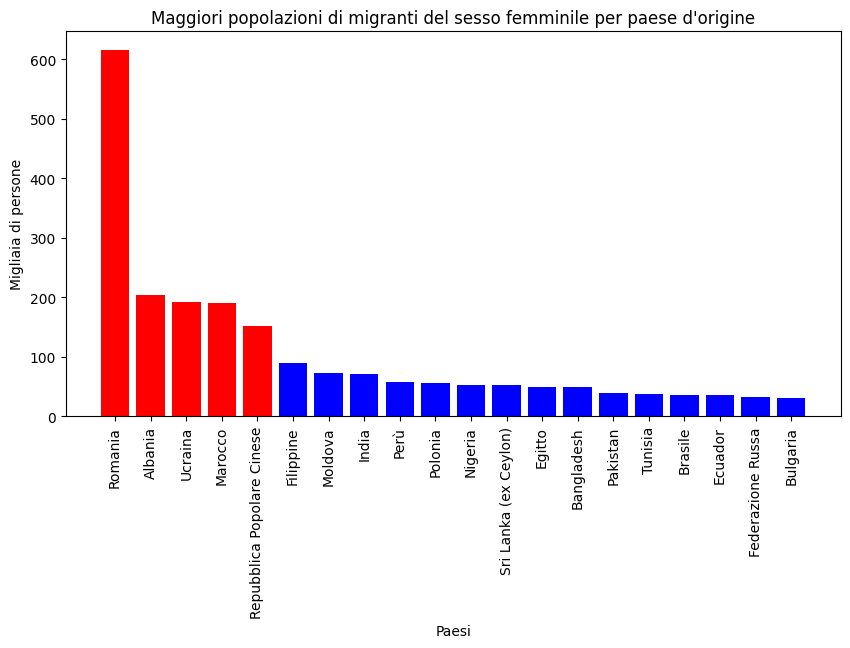

In [131]:
top_countries = df_sorted_by_number_of_women.head(20)
colors = ["red" if x > 100_000 else "blue" for x in  top_countries['Femmine']]
plt.figure(figsize=(10, 5))
plt.bar(top_countries['Paese'], top_countries['Femmine']/1000, color = colors)
plt.title("Maggiori popolazioni di migranti del sesso femminile per paese d'origine")
plt.xlabel("Paesi")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

Include nuove colonne alla tabella.
* Maschi - Femmine
* % Sopra la media : La differenza tra maschi e femmine sopra la metà del totale di migranti (indicato in valori percentuali)
* Proporzione Maschio/Femmina

In [21]:
assignments = {'Maschi - Femmine': lambda x: x['Maschi'] - x['Femmine'], \
               '% sopra la media': lambda x: 200*(x['Maschi'] - x['Femmine'])/x['Totale'], \
               'Proporzione Maschio/Femmina': lambda x: x['Maschi']/x['Femmine']}
df_diff_maschi_femmine = df.assign(**assignments)
df_diff_maschi_femmine = df_diff_maschi_femmine.sort_values(by=['Maschi - Femmine'], ascending=False).reset_index()
display(df_diff_maschi_femmine[['Paese', 'Maschi', 'Femmine', 'Maschi - Femmine', '% sopra la media', 'Proporzione Maschio/Femmina']])

Paese  Maschi  Femmine  \
0                                           Bangladesh  124275    49783   
1                                             Pakistan  104754    39375   
2                                              Senegal   82477    30121   
3                                               Egitto   97932    49865   
4                                              Marocco  224516   190572   
5                                                India   96741    70592   
6                                              Tunisia   64226    38196   
7                                               Gambia   21627     1010   
8                                                 Mali   19898     1134   
9                                              Nigeria   70616    53030   
10                                               Ghana   32140    15195   
11                                         Afghanistan   13432     3440   
12                                             Albania  213047   203782   
13                                      Costa d'Avorio   18865     9694   
14                                              Guinea   10170     1710   
15                               Sri Lanka (ex Ceylon)   57605    52223   
16                                             Algeria   11679     6416   
17                        Burkina Faso (ex Alto Volta)    9656     4548   
18                                             Somalia    7189     2160   
19                                              Kosovo   20165    16207   
20                                                Iraq    5416     1539   
21                                             Turchia   11587     8493   
22                          Repubblica Popolare Cinese  154993   152045   
23                                       Guinea Bissau    2112      236   
24                                                Togo    3593     1772   
25                                  Macedonia del Nord   26307    24783   
26                                               Sudan    2029      624   
27                                             Camerun    8362     7081   
28                                              Libano    2876     1727   
29                                               Siria    3821     2693   
30                                        Sierra Leone    1522      450   
31                                               Libia    1923      965   
32                                               Niger    1299      341   
33                                   Bosnia-Erzegovina   10701     9753   
34                                  Benin (ex Dahomey)    1607      899   
35                                             Liberia     882      213   
36                Territori dell'Autonomia Palestinese     988      374   
37                                          Mauritania     555      173   
38                                             Eritrea    3381     3023   
39                                               Nepal    1042      736   
40                                           Giordania     893      602   
41                                                Ciad     359       85   
42                       Repubblica Islamica dell'Iran    8368     8122   
43                                          San Marino     735      500   
44                                             Israele    1066      880   
45                                            Slovenia    1669     1571   
46                                           Sud Sudan     106       34   
47                                               Yemen     187      128   
48                                      Arabia Saudita     103       48   
49                            Repubblica Centrafricana     120       70   
50                                             Apolidi     345      298   
51                                            Malaysia     288      255   
52                                               Qatar      35        4   

<h3> Paesi con i più grandi eccessi assoluti di migranti maschi </h3>

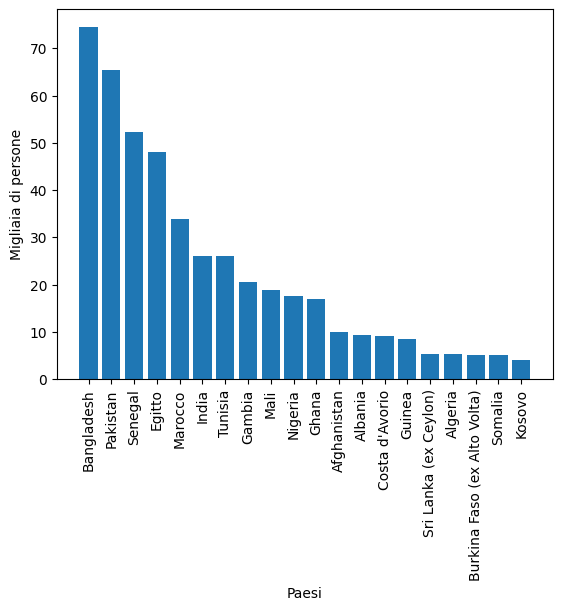

In [22]:
most_men_absolute = df_diff_maschi_femmine.head(20)
plt.bar(df_diff_maschi_femmine.loc[most_men_absolute.index]['Paese'], df_diff_maschi_femmine.loc[most_men_absolute.index]['Maschi - Femmine']/1000)
plt.xlabel("Paesi")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

<h3> Paesi con i più grandi eccessi assoluti di migrante femmine </h3>

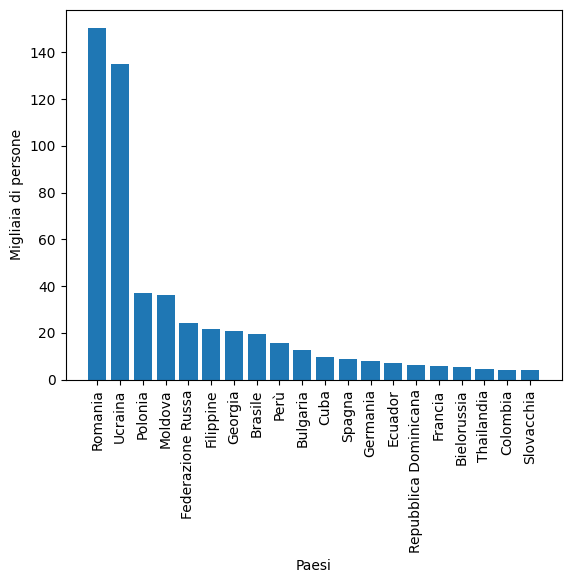

In [23]:
most_women_absolute = df_diff_maschi_femmine.tail(20).loc[::-1]
plt.bar(df_diff_maschi_femmine.loc[most_women_absolute.index]['Paese'], -1*df_diff_maschi_femmine.loc[most_women_absolute.index]['Maschi - Femmine']/1000)
plt.xlabel("Paesi")
plt.ylabel("Migliaia di persone")

plt.xticks(rotation='vertical')
plt.show()

<h3> Paesi con i più grandi eccessi di migranti maschi per % sopra la media. </h3>
Non sono stati inclusi paesi senza migranti maschi o senza migranti femmine.

In [24]:
df_diff_maschi_femmine = df_diff_maschi_femmine.sort_values(by=['% sopra la media'], ascending=False)
display(df_diff_maschi_femmine[(df_diff_maschi_femmine['Maschi'] > 0) & (df_diff_maschi_femmine['Femmine'] > 0)] \
        [['Paese', 'Maschi', 'Femmine', 'Maschi - Femmine', '% sopra la media', 'Proporzione Maschio/Femmina']].reset_index())

index                                              Paese  Maschi  \
0        7                                             Gambia   21627   
1        8                                               Mali   19898   
2       56                                            Maldive      14   
3       23                                      Guinea Bissau    2112   
4       52                                              Qatar      35   
5       14                                             Guinea   10170   
6       41                                               Ciad     359   
7       35                                            Liberia     882   
8       11                                        Afghanistan   13432   
9       32                                              Niger    1299   
10      20                                               Iraq    5416   
11      30                                       Sierra Leone    1522   
12      18                                            Somalia    7189   
13      26                                              Sudan    2029   
14      37                                         Mauritania     555   
15      46                                          Sud Sudan     106   
16       2                                            Senegal   82477   
17       1                                           Pakistan  104754   
18      36               Territori dell'Autonomia Palestinese     988   
19       0                                         Bangladesh  124275   
20      48                                     Arabia Saudita     103   
21      17                       Burkina Faso (ex Alto Volta)    9656   
22      10                                              Ghana   32140   
23      24                                               Togo    3593   
24      63                                            Lesotho       6   
25      31                                              Libia    1923   
26       3                                             Egitto   97932   
27      13                                     Costa d'Avorio   18865   
28      16                                            Algeria   11679   
29      34                                 Benin (ex Dahomey)    1607   
30      49                           Repubblica Centrafricana     120   
31      60                                Emirati Arabi Uniti      12   
32       6                                            Tunisia   64226   
33      61                                 Città del Vaticano      10   
34      28                                             Libano    2876   
35      54                                             Kuwait      43   
36      57                               Principato di Monaco      20   
37      58                                 Papua Nuova Guinea      20   
38      40                                          Giordania     893   
39      43                                         San Marino     735   
40      47                                              Yemen     187   
41      29                                              Siria    3821   
42      39                                              Nepal    1042   
43       5                                              India   96741   
44      21                                            Turchia   11587   
45       9                                            Nigeria   70616   
46      62                                             Bhutan      13   
47      65                                  Antigua e Barbuda       9   
48      64                                            Bahrein      14   
49      19                                             Kosovo   20165   
50      44                                            Israele    1066   
51      67                                              Tonga       6   
52      27                                            Camerun    8362   
53       4                                            Marocco  

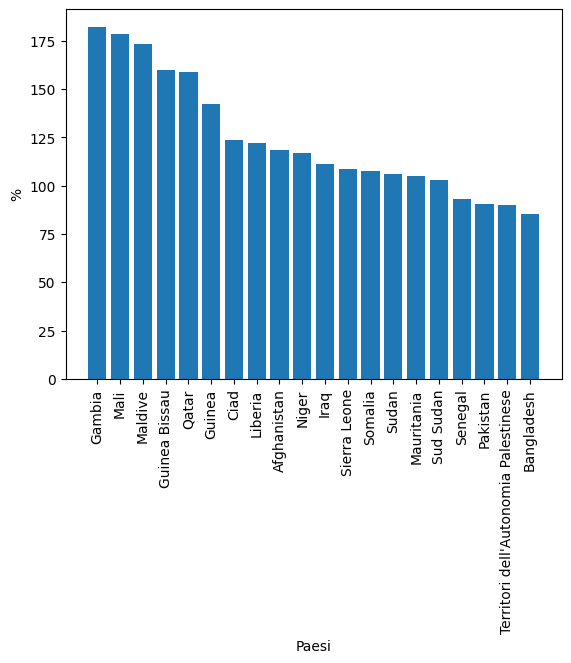

In [25]:
most_men_proportional = df_diff_maschi_femmine[(df_diff_maschi_femmine['Maschi'] > 0) & (df_diff_maschi_femmine['Femmine'] > 0)].head(20)['Paese']
plt.bar(most_men_proportional, df_diff_maschi_femmine.loc[most_men_proportional.index]['% sopra la media'])

plt.xlabel("Paesi")
plt.ylabel("%")

plt.xticks(rotation='vertical')
plt.show()

<h3> Paesi con i più grandi eccessi di migrante femmine per % sopra la media. </h3>
Non sono stati inclusi paesi senza migranti maschi o senza migranti femmine.

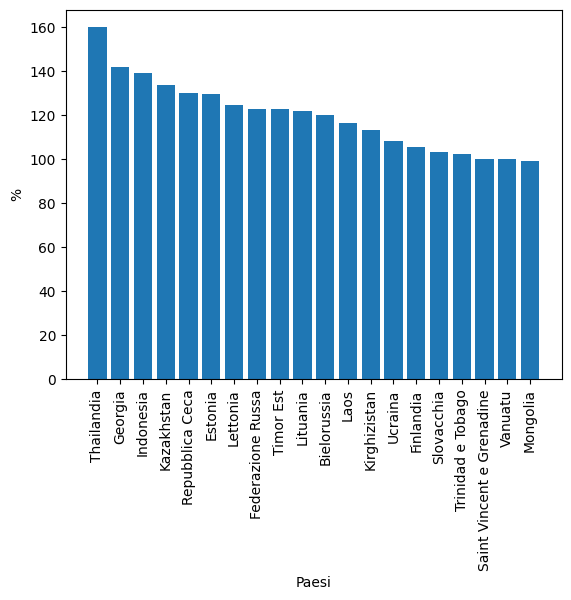

In [26]:
most_women_proportional = df_diff_maschi_femmine[(df_diff_maschi_femmine['Maschi'] > 0) & (df_diff_maschi_femmine['Femmine'] > 0)].tail(20)['Paese']

plt.bar(most_women_proportional.loc[::-1], -1*df_diff_maschi_femmine.loc[most_women_proportional.index].loc[::-1]['% sopra la media'])
plt.xlabel("Paesi")
plt.ylabel("%")

plt.xticks(rotation='vertical')
plt.show()

<h3> Paesi con popolazioni di migranti più desuguale (rapporto uomo/donne) </h3>

In [27]:
df_country_most_unequals = pd.DataFrame({"Eccesso assoluto di maschi" : most_men_absolute['Paese'].values, "Eccesso assoluto di femmine": most_women_absolute['Paese'].values, "Eccesso proporzionale di maschi": most_men_proportional.values, "Eccesso proporzionale di femmine": most_women_proportional.values})
display(df_country_most_unequals)

Eccesso assoluto di maschi Eccesso assoluto di femmine  \
0                     Bangladesh                     Romania   
1                       Pakistan                     Ucraina   
2                        Senegal                     Polonia   
3                         Egitto                     Moldova   
4                        Marocco           Federazione Russa   
5                          India                   Filippine   
6                        Tunisia                     Georgia   
7                         Gambia                     Brasile   
8                           Mali                        Perù   
9                        Nigeria                    Bulgaria   
10                         Ghana                        Cuba   
11                   Afghanistan                      Spagna   
12                       Albania                    Germania   
13                Costa d'Avorio                     Ecuador   
14                        Guinea       Repubblica Dominicana   
15         Sri Lanka (ex Ceylon)                     Francia   
16                       Algeria                 Bielorussia   
17  Burkina Faso (ex Alto Volta)                  Thailandia   
18                       Somalia                    Colombia   
19                        Kosovo                  Slovacchia   

         Eccesso proporzionale di maschi Eccesso proporzionale di femmine  
0                                 Gambia                         Mongolia  
1                                   Mali                          Vanuatu  
2                                Maldive        Saint Vincent e Grenadine  
3                          Guinea Bissau                Trinidad e Tobago  
4                                  Qatar                       Slovacchia  
5                                 Guinea                        Finlandia  
6                                   Ciad                          Ucraina  
7                                Liberia                     Kirghizistan  
8                            Afghanistan                             Laos  
9                                  Niger                      Bielorussia  
10                                  Iraq                         Lituania  
11                          Sierra Leone                        Timor Est  
12                               Somalia                Federazione Russa  
13                                 Sudan                         Lettonia  
14                            Mauritania                          Estonia  
15                             Sud Sudan                  Repubblica Ceca  
16                               Senegal                       Kazakhstan  
17                              Pakistan                        Indonesia  
18  Territori dell'Autonomia Palestinese                          Georgia  
19                            Bangladesh                       Thailandia

Legge i codici ISO dei paesi e fa il merge con il data frame originale

In [28]:
df_codes = pd.read_csv("codes.csv", delimiter=";")
df_codes = df_codes.map(lambda x: x.strip() if isinstance(x, str) else x)
df_join_code = df_codes.join(df.set_index("Paese"), on="Paese")
df_join_code["% Maschi"] = 100*df_join_code["Maschi"]/df_join_code["Totale"]

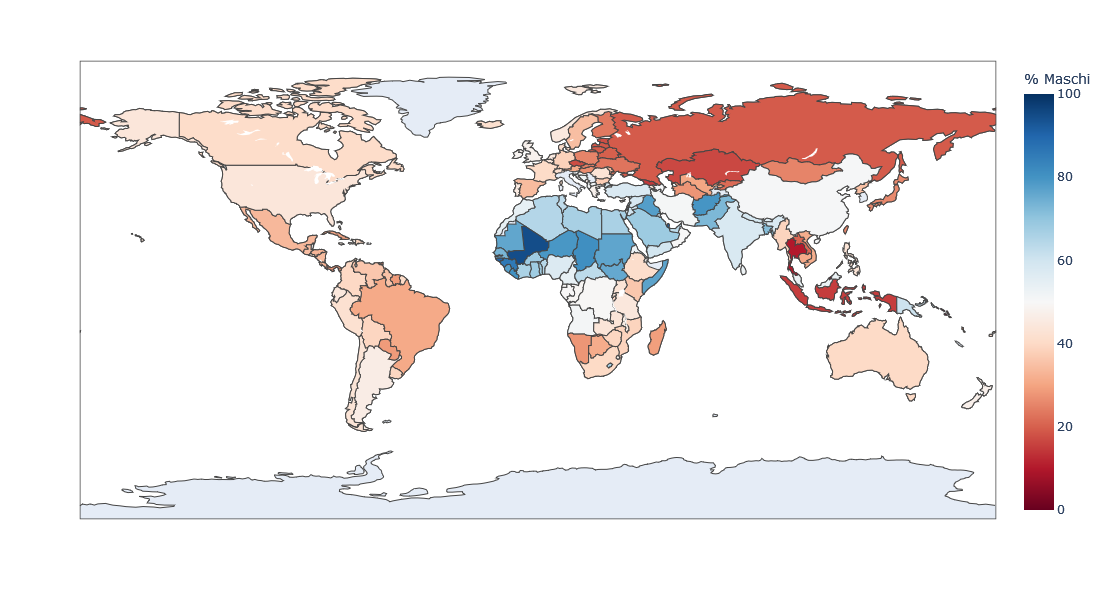

In [29]:
fig = px.choropleth(df_join_code, locations=df_join_code["Code"],
                    color="% Maschi",
                    hover_name="Paese", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.RdBu)
fig.update_layout(showlegend=True)

fig.update_layout(height=600,
                  width=900)

fig.show()

In [30]:
df_popolazione = pd.read_csv("data-popolazione.csv", delimiter=";")
df_popolazione = df_popolazione.map(lambda x: x.strip() if isinstance(x, str) else x)
df_join_popolazione = df_popolazione.join(df.set_index("Paese"), on="Paese")
df_join_popolazione["Migranti per 100 mila abitanti"] = 100_000*df_join_popolazione["Totale"]/df_join_popolazione["Popolazione"]
df_join_popolazione = df_codes.join(df_join_popolazione.set_index("Paese"), on="Paese")
pd.set_option('display.max_rows', df_join_popolazione.shape[0]+1)
df_join_popolazione['Popolazione'] = df_join_popolazione['Popolazione'].astype(int, errors='ignore')
df_join_popolazione = df_join_popolazione.sort_values(by='Migranti per 100 mila abitanti', ascending=False)
display(df_join_popolazione[:20])

Paese Code  Popolazione                        Area  \
1                  Albania  ALB      2845955     Europa centro orientale   
143                Romania  ROU     19917984              Unione Europea   
109                Moldova  MDA      2512758     Europa centro orientale   
150             San Marino  SML        33908         Altri paesi europei   
98      Macedonia del Nord  MKD      1829954     Europa centro orientale   
36      Città del Vaticano  VAT          764         Altri paesi europei   
44                Dominica  DMA        73040  America centro meridionale   
105                Marocco  MAR     38073961       Africa settentrionale   
59                  Gambia  GMB      2335504          Africa occidentale   
177                Tunisia  TUN     11708370       Africa settentrionale   
60                 Georgia  GEO      3716858            Asia occidentale   
26                Bulgaria  BGR      6445481              Unione Europea   
151                Senegal  SEN     16705608          Africa occidentale   
180                Ucraina  UKR     37484588     Europa centro orientale   
32              Capo Verde  CPV       556857          Africa occidentale   
22       Bosnia-Erzegovina  BIH      3332593     Europa centro orientale   
160  Sri Lanka (ex Ceylon)  LKA     21803000     Asia centro meridionale   
107              Mauritius  MUS      1266000            Africa orientale   
41                 Croazia  HRV      4058165              Unione Europea   
45                 Ecuador  ECU     17625048  America centro meridionale   

       Maschi   Femmine     Totale       %    Totale   \
1    213047.0  203782.0   416829.0   8,11%   416829.0   
143  465632.0  616204.0  1081836.0  21,04%  1081836.0   
109   36778.0   73026.0   109804.0   2,14%   109804.0   
150     735.0     500.0     1235.0   0,02%     1235.0   
98    26307.0   24783.0    51090.0   0,99%    51090.0   
36       10.0       6.0       16.0   0,00%       16.0   
44      410.0     678.0     1088.0   0,02%     1088.0   
105  224516.0  190572.0   415088.0   8,07%   415088.0   
59    21627.0    1010.0    22637.0   0,44%    22637.0   
177   64226.0   38196.0   102422.0   1,99%   102422.0   
60     4243.0   24979.0    29222.0   0,57%    29222.0   
26    18510.0   31008.0    49518.0   0,96%    49518.0   
151   82477.0   30121.0   112598.0   2,19%   112598.0   
180   57263.0  192350.0   249613.0   4,86%   249613.0   
32     1285.0    2388.0     3673.0   0,07%     3673.0   
22    10701.0    9753.0    20454.0   0,40%    20454.0   
160   57605.0   52223.0   109828.0   2,14%   109828.0   
107    2180.0    2863.0     5043.0   0,10%     5043.0   
41     7580.0    7934.0    15514.0   0,30%    15514.0   
45    28003.0   35208.0    63211.0   1,23%    63211.0   

     Migranti per 100 mila abitanti  
1                      14646.366510  
143                     5431.453304  
109                     4369.859732  
150                     3642.208328  
98                      2791.873457  
36                      2094.240838  
44                      1489.594743  
105                     1090.214911  
59                       969.255458  
177                      874.775908  
60                       786.201679  
26                       768.259188  
151                      674.013182  
180                      665.908346  
32                       659.594833  
22                       613.756315  
160                      503.728845  
107                      398.341232  
41                       382.291011  
45                       358.642995

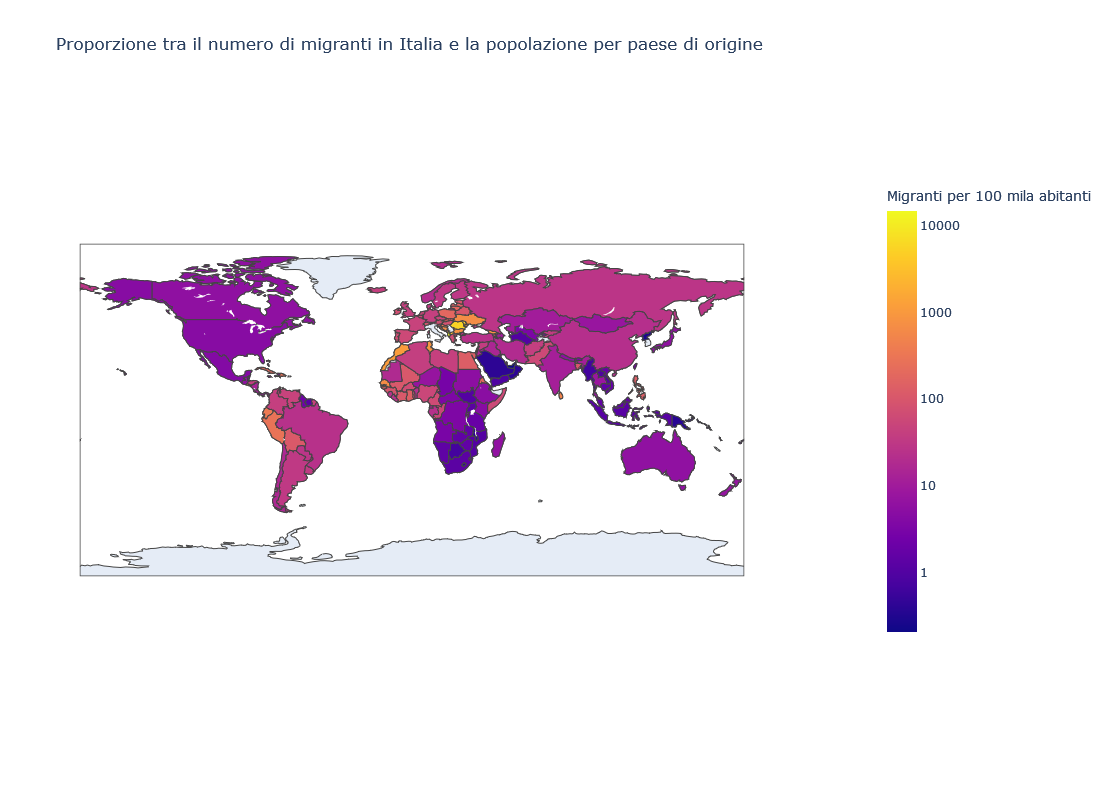

In [32]:
fig = go.Figure(data=go.Choropleth(
    locations=df_join_popolazione["Code"],
    z= np.log10(df_join_popolazione['Migranti per 100 mila abitanti'].astype(float)),
    colorscale=px.colors.sequential.Plasma,
    autocolorscale=False,
     hovertemplate ='<i>Migranti per 100 mila abitanti </i>:'+ 
                     df_join_popolazione["Migranti per 100 mila abitanti"].map(lambda value: f"{value:.2f}") +
                    '<br><b>Paesi</b>: %{x}<br>',
    text= df_join_popolazione['Migranti per 100 mila abitanti'].astype(str) + '\n'  +df_join_popolazione['Paese'], # hover text
    colorbar_title="Migranti per 100 mila abitanti",
    colorbar=dict(len=0.75, 
                  x=1.2,
                  tickvals=[0, 1, 2, 3, 4, 4.30103],
                  ticktext=['1', '10', '100', '1000', '10000', '20000']
                  )
))

fig.update_yaxes(type="log")

fig.update_layout(showlegend=True,
                  title_text='Proporzione tra il numero di migranti in Italia e la popolazione per paese di origine',
                  height=800,
                  width=1200)

fig.show()
